#### Predictive model for price of Plastic fastners

In [1]:
#Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\91909\\0 Real Project\\08. Predictive_model_Plastic_fastner'

In [3]:
sns.set_theme(context='notebook',
    style='whitegrid',
    palette='hls')

In [4]:
data = pd.read_excel('regression.xlsx')
data.head()

,Supplier_region,Material_user,Item_weight_gm,Price_JPY
0,APAC,Thailand,5926,2278.156577
1,APAC,Singapore,5926,2699.752782
2,APAC,Thailand,5618,2278.156577
3,APAC,Singapore,5618,2699.752782
4,APAC,Thailand,3944,1392.145802


In [5]:
#Information
a = pd.DataFrame(np.round(data.isnull().mean()*100,2),columns = ['null_percent'])
b = pd.DataFrame(data.isnull().sum(),columns = ['null_count'])
c = pd.DataFrame(data.dtypes, columns = ['DataType'])
d = pd.DataFrame(data.nunique(),columns = ['Nunique_values'])
e = pd.DataFrame(data.head(2).T)
e.columns = ['S1','S2']
info = pd.concat([a,b,c,d,e],axis = 1)
info

,null_percent,null_count,DataType,Nunique_values,S1,S2
Supplier_region,0.0,0,object,2,APAC,APAC
Material_user,0.0,0,object,2,Thailand,Singapore
Item_weight_gm,0.0,0,int64,26,5926,5926
Price_JPY,0.0,0,float64,70,2278.156577,2699.752782


In [6]:
#Describe
data.describe()

,Item_weight_gm,Price_JPY
count,90.000000,90.000000
mean,404.955556,216.167379
std,1308.249091,592.363552
min,1.000000,0.988116
25%,2.000000,12.269620
50%,11.000000,21.354287
75%,27.000000,43.888824
max,5926.000000,2699.752782


In [7]:
data.columns

Index(['Supplier_region', 'Material_user', 'Item_weight_gm', 'Price_JPY'], dtype='object')

In [8]:
numeric = ['Item_weight_gm']
nominal = ['Supplier_region','Material_user']

#### Visulaization

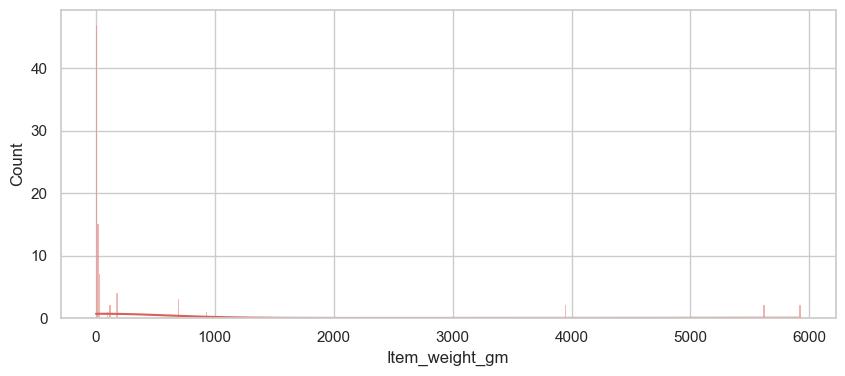

In [9]:
#Univariant Analysis continuous
plt.figure(figsize = (10,4))
sns.histplot(x = 'Item_weight_gm',data = data,bins = 'auto',kde = True)
plt.show()

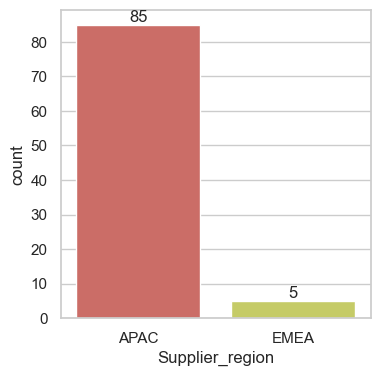

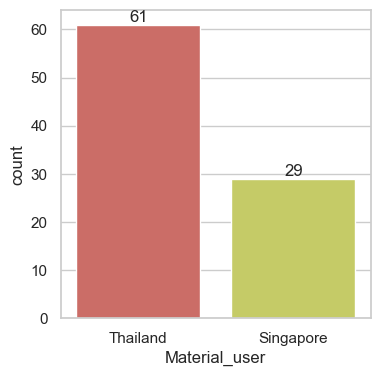

In [10]:
#Univariant Analysis Categorical
for i in nominal:
    plt.figure(figsize = (4,4))
    ax = sns.countplot(x = i,data =data,hue = i)
    for j in ax.containers:
        ax.bar_label(j,fmt = '%d')
    plt.show()
    

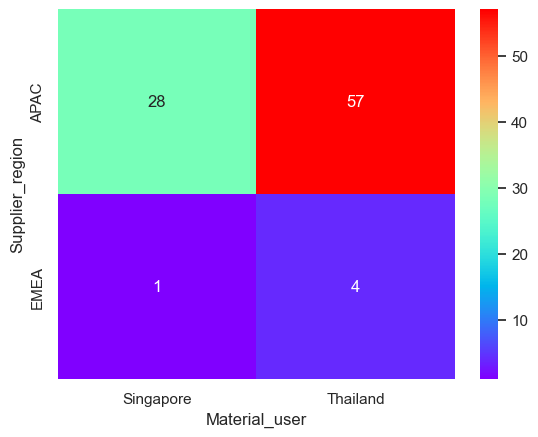

In [11]:
#Bivariant Analysis cross tab
cross_tab = pd.crosstab(data['Supplier_region'], data['Material_user'])
sns.heatmap(cross_tab,annot = True,cmap = 'rainbow')
plt.show()

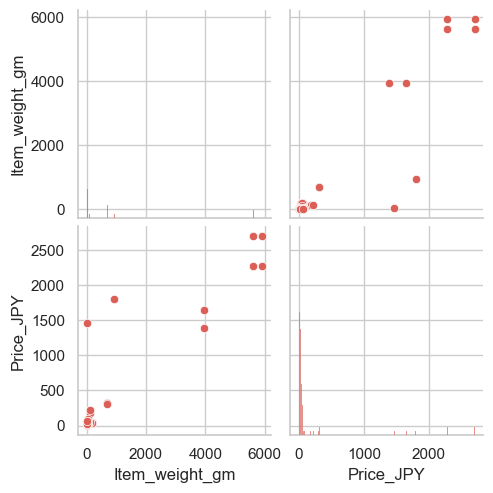

In [12]:
#Multivariant Analysis
sns.pairplot(data)
plt.show()

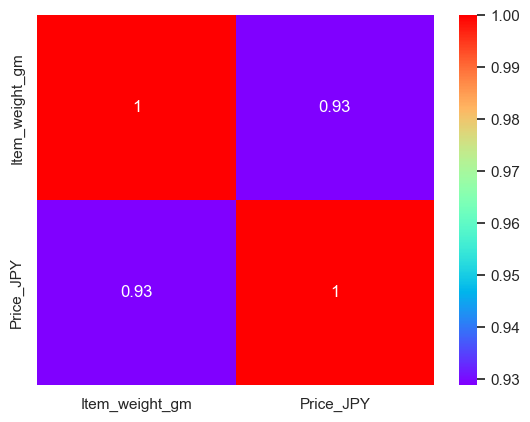

In [13]:
#Correlation Analysis
sns.heatmap(data[['Item_weight_gm','Price_JPY']].corr(),annot = True,cmap = 'rainbow')
plt.show()

In [14]:
x,y = data.drop('Price_JPY',axis = 1),data['Price_JPY']

#### Preprocessing

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [16]:
numeric_pipeline = Pipeline([
    ('scaling',RobustScaler())
])
categorical_pipeline = Pipeline([
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
preprocessor = ColumnTransformer([
    ('numeric',numeric_pipeline,numeric),
    ('nominal',categorical_pipeline,nominal)
])

#### Modelling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [20]:
models = {
    'LinearRegression':LinearRegression(),
          'DecisionTreeRegressor':DecisionTreeRegressor(),
          'RandomForestRegressor':RandomForestRegressor(),
          'AdaBoostRegressor':AdaBoostRegressor(),
          'XGBRegressor':XGBRegressor(),
          'KNeighborsRegressor':KNeighborsRegressor(),
          'SVR':SVR()
}
          

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
for name,model in models.items():
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state = 10)
    model_pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    model_pipeline.fit(xtrain,ytrain)
    pred = model_pipeline.predict(xtest)
    print('*'*50)
    print(f'Model name is {name}')
    print('\n')
    print(f'r2_score {r2_score(pred,ytest):.2f}')
    print(f'mean_squared_error {mean_squared_error(pred,ytest):.2f}')
    print(f'mean_absolute_error {mean_absolute_error(pred,ytest):.2f}')
    
    

**************************************************
Model name is LinearRegression


r2_score 0.77
mean_squared_error 75541.92
mean_absolute_error 94.11
**************************************************
Model name is DecisionTreeRegressor


r2_score 0.43
mean_squared_error 308310.56
mean_absolute_error 220.42
**************************************************
Model name is RandomForestRegressor


r2_score 0.53
mean_squared_error 175684.00
mean_absolute_error 183.37
**************************************************
Model name is AdaBoostRegressor


r2_score 0.43
mean_squared_error 308511.50
mean_absolute_error 229.62
**************************************************
Model name is XGBRegressor


r2_score -0.21
mean_squared_error 375509.36
mean_absolute_error 288.54
**************************************************
Model name is KNeighborsRegressor


r2_score 0.14
mean_squared_error 152395.09
mean_absolute_error 161.98
**************************************************
Model name is SV

In [23]:
mod_pipeline = Pipeline([
        ('preprocessor',preprocessor),
        ('model',LinearRegression())
    ])

In [24]:
mod_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['Item_weight_gm']),
                                                 ('nominal',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Supplier_region',
                                                   'Material_user'])])),
                ('model', LinearRegression())])

In [28]:
pred = mod_pipeline.predict(xtest)
print('*'*50)
print('Model name is LinearRegression')
print(f'r2_score {r2_score(pred,ytest):.2f}')
print(f'mean_squared_error {mean_squared_error(pred,ytest):.2f}')
print(f'mean_absolute_error {mean_absolute_error(pred,ytest):.2f}')

**************************************************
Model name is LinearRegression
r2_score 0.77
mean_squared_error 75541.92
mean_absolute_error 94.11


In [29]:
import joblib

In [31]:
preprocessor = mod_pipeline.named_steps['preprocessor']
model = mod_pipeline.named_steps['model']

In [32]:
joblib.dump(preprocessor,'preprocessor.pkl')
joblib.dump(model,'model.pkl')

['model.pkl']